## This notebook classifies movie reviews as positive or negative using the text of the review. This is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem.

## We'll use the IMDB dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

/Users/gmontes/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


In [5]:
# Download the IMDB dataset.
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 35s 2us/step


In [7]:
# Explore the data.
# The dataset comes preprocessed: each example is an array of integers representing the words of the movie review.
# Each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.
# train_data & test_data contains Reviews that are Array of integers.
# train_labels & test_labels are ints: 1 is positive, 0 is negative.
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

print(train_data[0])
print(train_labels[0])
print(test_data[0])
print(test_labels[0])

(25000,)
(25000,)
(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
[1, 591, 202, 14, 31, 

In [13]:
# Convert the integers back to words.
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [20]:
# Prepare the data.
# The reviews—the arrays of integers—must be converted to tensors before fed into the neural network.
# Since the movie reviews must be the same length, we will use the pad_sequences function to standardize the lengths.
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

print(len(train_data[0]), len(train_data[1]))
print(train_data[0])
print(train_data[1])

256 256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

In [26]:
# Build the model.

# The neural network is created by stacking layers—this requires two main architectural decisions:
# 1 -How many layers to use in the model?
# 2 - How many hidden units to use for each layer?

# Input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()

# This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. 
# These vectors are learned as the model trains. 
# The vectors add a dimension to the output array. 
# The resulting dimensions are: (batch, sequence, embedding).
model.add(keras.layers.Embedding(vocab_size, 16))

# Returns a fixed-length output vector for each example by averaging over the sequence dimension.
# This allows the model to handle input of variable length, in the simplest way possible.
model.add(keras.layers.GlobalAveragePooling1D())

# This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.
model.add(keras.layers.Dense(16, activation=tf.nn.relu))

# The last layer is densely connected with a single output node. 
# Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability, or confidence level.
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Configure the model to use an optimizer and a loss function:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [42]:
# Create a validation set.
# Create a validation set by setting apart 10,000 examples from the original training data.
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [43]:
# Train the model.
# Train the model for 40 epochs in mini-batches of 512 samples. 
# This is 40 iterations over all samples in the x_train and y_train tensors
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 3s 208us/sample - loss: 0.6918 - acc: 0.5195 - val_loss: 0.6899 - val_acc: 0.5351
Epoch 2/40
15000/15000 [==============================] - 2s 144us/sample - loss: 0.6856 - acc: 0.6113 - val_loss: 0.6813 - val_acc: 0.6307
Epoch 3/40
15000/15000 [==============================] - 2s 143us/sample - loss: 0.6717 - acc: 0.7000 - val_loss: 0.6640 - val_acc: 0.7228
Epoch 4/40
15000/15000 [==============================] - 2s 145us/sample - loss: 0.6478 - acc: 0.7346 - val_loss: 0.6371 - val_acc: 0.7586
Epoch 5/40
15000/15000 [==============================] - 2s 145us/sample - loss: 0.6133 - acc: 0.7787 - val_loss: 0.6017 - val_acc: 0.7834
Epoch 6/40
15000/15000 [==============================] - 2s 145us/sample - loss: 0.5704 - acc: 0.8125 - val_loss: 0.5609 - val_acc: 0.7983
Epoch 7/40
15000/15000 [==============================] - 2s 1

In [44]:
# Evaluate the model.
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 25us/sample - loss: 0.3387 - acc: 0.8704
[0.33866845923423766, 0.87044]


In [45]:
# Create a graph of accuracy and loss over time.
# model.fit() returns a History object that contains a dictionary with everything that happened during training.
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

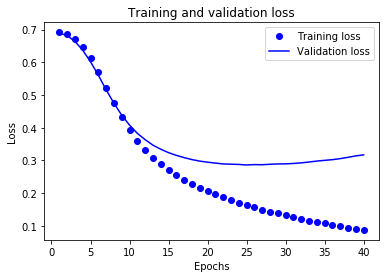

In [47]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

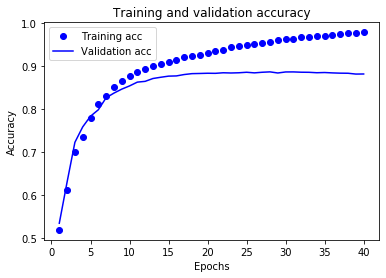

In [48]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Notice the training loss decreases with each epoch and the training accuracy increases with each epoch.
### This isn't the case for the validation loss and accuracy—they seem to peak after about twenty epochs. This is an example of overfitting: the model performs better on the training data than it does on data it has never seen before.